### Импорт библиотек

In [42]:
!python -m pip install pandas matplotlib

import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


### Первичный осмотр

In [43]:
# Подгружаем датасет.
df: DataFrame = pd.read_csv('./S02-hw-dataset.csv')

# Первые строки.
print("Первые 5 строк:")
display(df.head())

# Информация о столбцах и типах.
print("\nИнформация о датафрейме:")
df.info()

# Описательные статистики.
print("\nОписательные статистики:")
display(df.describe(include='all'))

Первые 5 строк:


,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296



Информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB

Описательные статистики:


,user_id,age,country,purchases,revenue
count,41.000000,39.000000,41,41.000000,41.000000
unique,NaN,NaN,5,NaN,NaN
top,NaN,NaN,RU,NaN,NaN
freq,NaN,NaN,13,NaN,NaN
mean,20.243902,36.512821,NaN,4.829268,820.048780
std,11.659289,18.304259,NaN,2.710189,613.127269
min,1.000000,5.000000,NaN,-1.000000,0.000000
25%,10.000000,24.000000,NaN,3.000000,432.000000
50%,20.000000,33.000000,NaN,5.000000,693.000000
75%,30.000000,45.500000,NaN,7.000000,1115.000000


### Пропуски, дубликаты и базовый контроль качества

In [44]:
# Доля пропусков.
print("Доля пропусков по столбцам:")
print(df.isna().mean())

# Дубликаты строк.
print(f"\nКоличество полных дубликатов: {df.duplicated().sum()}")

# Подозрительные значения.
print("\nПодозрительные записи:")

# Отрицательные покупки.
worng_purchases = df[df['purchases'] < 0]
if not worng_purchases.empty:
    print("Записи с отрицательным количеством покупок:")
    display(worng_purchases)

# Возраст > 110 или < 0.
worng_age = df[(df['age'] > 110) | (df['age'] < 0)]
if not worng_age.empty:
    print("Записи с нереалистичным возрастом:")
    display(worng_age)

# Есть покупки, но нет дохода.
worng_revenue = df[(df['purchases'] > 0) & (df['revenue'] == 0)]
if not worng_revenue.empty:
    print("Покупки > 0, но доход = 0:")
    display(worng_revenue)

Доля пропусков по столбцам:
user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

Количество полных дубликатов: 1

Подозрительные записи:
Записи с отрицательным количеством покупок:


,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


Записи с нереалистичным возрастом:


,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


Покупки > 0, но доход = 0:


,user_id,age,country,purchases,revenue
10,11,24.0,US,4,0


### Описание выявленных проблем качества датасета:

#### Полнота
В датасете присутствуют записи, в которых отсутствует значение для поля. А именно, в 0.04878 ≈ 4% записей нет значения age.
#### Уникальность
В датасете есть две записи с полностью идентичными полями. Это дубликат, которого не должно быть в качественном датасете.
#### Валидность
В датасете фигурируют записи с невалидными значениями. Например: отрицательное число покупок (purchases), нереалистичный возраст (age), отсутствие дохода, при ненулевом количестве покупок (purchases, revenue).

### Базовый EDA: группировки, агрегаты и частоты

In [45]:
# Частоты по странам.
print("Распределение пользователей по странам:")
print(df['country'].value_counts())

# Группировка по стране: средние и суммы.
print("\nАгрегация по странам:")
grouped = df.groupby('country').agg(
    count_users=('user_id', 'size'),
    avg_purchases=('purchases', 'mean'),
    avg_revenue=('revenue', 'mean'),
    total_revenue=('revenue', 'sum')
).round(2)
display(grouped)

# Возрастные группы (исключаем строки, где age = NaN, чтобы не подмешивать в датасет неполные данные).
df_with_age = df.dropna(subset=['age']).copy()

# Определяем возрастные группы.
bins = [0, 17, 35, 60, 150]
labels = ['<18', '18–35', '36–60', '>60']
df_with_age['age_group'] = pd.cut(df_with_age['age'], bins=bins, labels=labels, right=False)

print("\nРаспределение по возрастным группам (только записи с известным возрастом):")
print(df_with_age['age_group'].value_counts().sort_index())

# Средний доход по возрастным группам.
print("\nСредний доход по возрастным группам:")
print(df_with_age.groupby('age_group', observed=True)['revenue'].mean().round(2))

Распределение пользователей по странам:
country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

Агрегация по странам:


,count_users,avg_purchases,avg_revenue,total_revenue
country,,,,
CN,2,4.50,1054.00,2108
DE,6,6.50,1445.50,8673
FR,12,4.25,675.92,8111
RU,13,4.77,790.08,10271
US,8,4.62,557.38,4459



Распределение по возрастным группам (только записи с известным возрастом):
age_group
<18       1
18–35    20
36–60    17
>60       1
Name: count, dtype: int64

Средний доход по возрастным группам:
age_group
<18      1488.00
18–35     813.35
36–60     773.88
>60       785.00
Name: revenue, dtype: float64


По распределению пользователей по странам доминирует Россия (13 пользователей) и Франция (12 пользователей). Однако, неожиданным результатом является то, что с точки зрения монетизации, Германия демонстрирует наибольший средний доход.
Анализ возрастных категорий показывает, что основная масса пользователей это группа 18-35 лет. Также, неожиданным результатом оказалось то, что наибольший доход (1488) оказался у человека возрастом в 5 лет. 

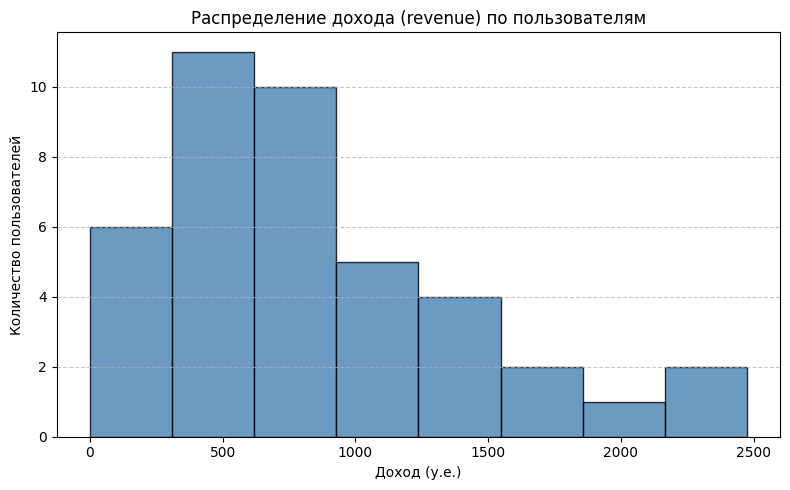

In [46]:
# Гистограмма: распределение revenue
plt.figure(figsize=(8, 5))
plt.hist(df['revenue'], bins=8, color='steelblue', edgecolor='black', alpha=0.8)
plt.title('Распределение дохода (revenue) по пользователям')
plt.xlabel('Доход (у.е.)')
plt.ylabel('Количество пользователей')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('./figures/histogram_revenue.png', dpi=150)
plt.show()

Гистограмма показывает, что большинство пользователей приносят доход до 1000, но есть отдельные "хвосты" с высоким доходом (до 2500), что указывает на правостороннюю асимметрию.

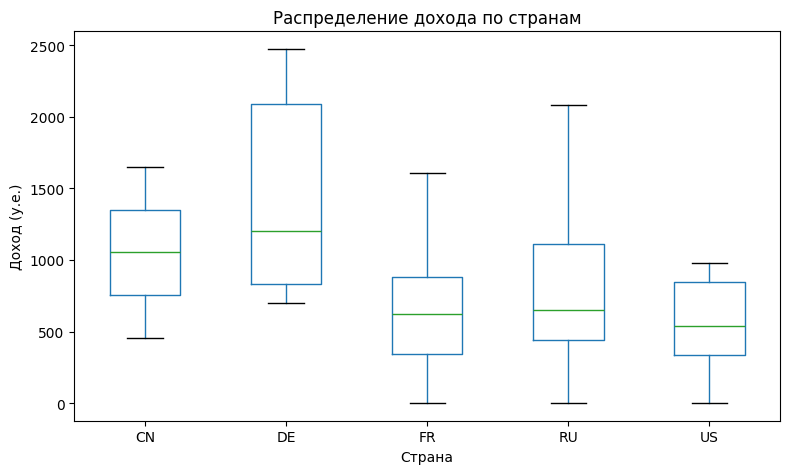

In [47]:
# Boxplot: revenue по странам
plt.figure(figsize=(8, 5))
df.boxplot(column='revenue', by='country', ax=plt.gca(), grid=False)
plt.title('Распределение дохода по странам')
plt.suptitle('')  # Убираем автоматический заголовок "Boxplot grouped by..."
plt.xlabel('Страна')
plt.ylabel('Доход (у.е.)')
plt.tight_layout()
plt.savefig('./figures/boxplot.png', dpi=150)
plt.show()

Немецкие пользователи (DE) демонстрируют самые высокие значения дохода без выбросов, в то время как RU и FR имеют более низкие медианы и большой разброс, включая нулевые значения.

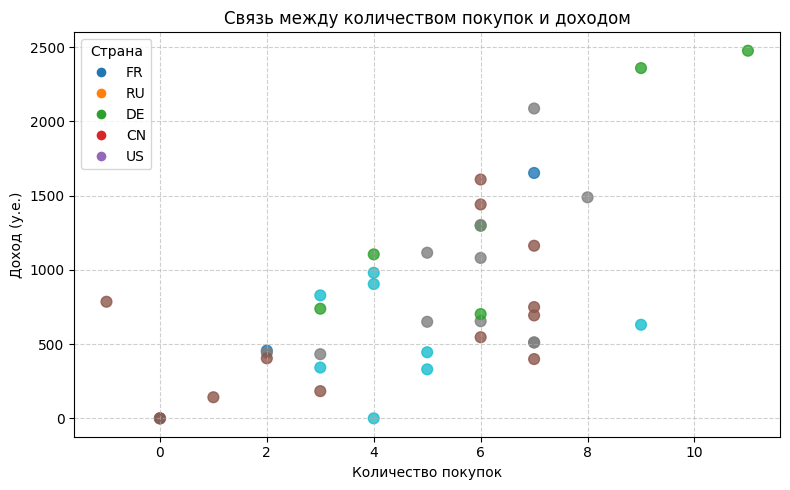

In [48]:
# Scatter plot: purchases vs revenue, цвет по стране
plt.figure(figsize=(8, 5))
scatter = plt.scatter(
    df['purchases'], 
    df['revenue'], 
    c=pd.Categorical(df['country']).codes,  # цвет по стране
    cmap='tab10',
    alpha=0.8,
    s=60
)

# Легенда
countries = df['country'].unique()
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.tab10(i), markersize=8)
           for i in range(len(countries))]
plt.legend(handles, countries, title="Страна")

plt.title('Связь между количеством покупок и доходом')
plt.xlabel('Количество покупок')
plt.ylabel('Доход (у.е.)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('./figures/scatter_purchases_revenue.png', dpi=150)
plt.show()

В целом наблюдается положительная связь: больше покупок → выше доход.
Однако есть аномалии. Например, 4 покупки при нулевом доходе (US) и отрицательные покупки (FR). Пользователи из DE и CN сконцентрированы в зоне высоких значений.